<a href="https://colab.research.google.com/github/ememdeee/Python-Artificial-Intelligence-Stuff/blob/main/WaterShed_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

uint8 (433, 577, 3)


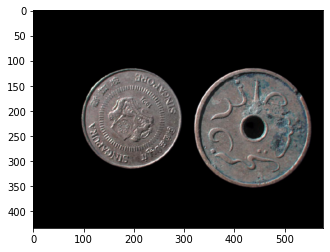

In [ ]:
img = cv2.imread('coinn.png')
print(img.dtype, img.shape)
plt.imshow(img)

(433, 577)


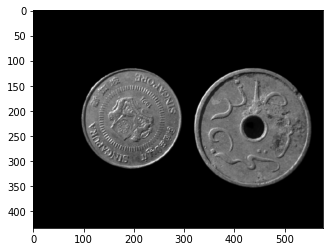

In [ ]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
plt.imshow(img_gray,'gray')

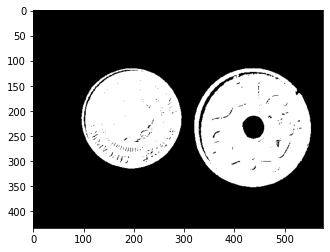

In [ ]:
ret1, thresh = cv2.threshold(img_gray, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# thresh = 255 - thresh
plt.imshow(thresh,'gray')

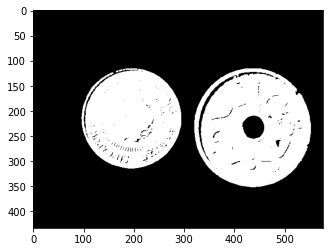

In [ ]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 1)
plt.imshow(opening,'gray')

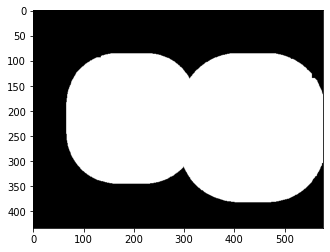

In [ ]:
sure_bg = cv2.dilate(opening, kernel,iterations = 30)
plt.imshow(sure_bg,'gray')

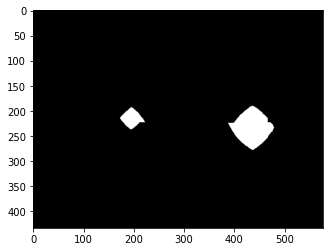

In [ ]:
sure_fg = cv2.erode(sure_bg, kernel,iterations = 88)
plt.imshow(sure_fg,'gray')


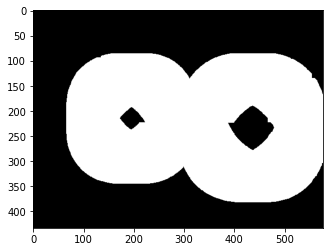

In [ ]:
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,'gray')

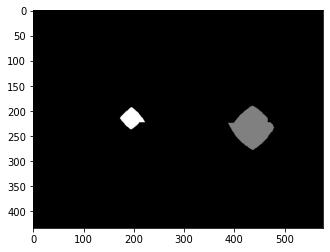

In [ ]:
ret3, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers,'gray')

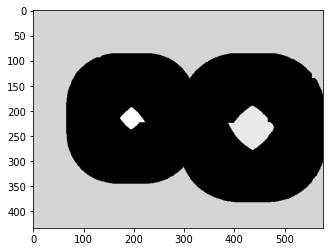

In [ ]:
markers = markers + 10
markers[unknown == 255] = 0
plt.imshow(markers , 'gray')


In [ ]:
markers = cv2.watershed(img,markers)

In [ ]:
print(markers)

[[-1 -1 -1 ... -1 -1 -1]
 [-1 10 10 ... 10 10 -1]
 [-1 10 10 ... 10 10 -1]
 ...
 [-1 10 10 ... 10 10 -1]
 [-1 10 10 ... 10 10 -1]
 [-1 -1 -1 ... -1 -1 -1]]


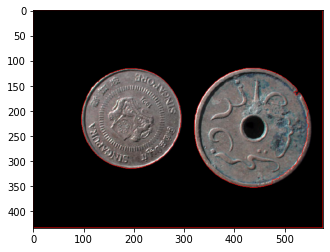

In [ ]:
img[markers == -1] = [255,0,0]
plt.imshow(img)